# Plant Diseas Predictions


- [Keras Code Example ](https://keras.io/examples/)

In [40]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import random
from PIL import Image
import pandas as pd

In [2]:
import cv2
# !pip install opencv-python

In [3]:
# !pip install tensorflow==2.9.1
import tensorflow as tf

In [9]:
figsize=(12,12)
path = r"D:\DataScience-60\PlantDiseasePrediction\Data\Plant_images\Potato___Early_blight"
os.listdir(path)
potato = os.path.join(path)
potato

'D:\\DataScience-60\\PlantDiseasePrediction\\Data\\Plant_images\\Potato___Early_blight'

In [100]:
import os
os.path.abspath(os.path.dirname('__file__'))

'D:\\DataScience-60\\PlantDiseasePrediction'

In [10]:
len(os.listdir(potato))

300

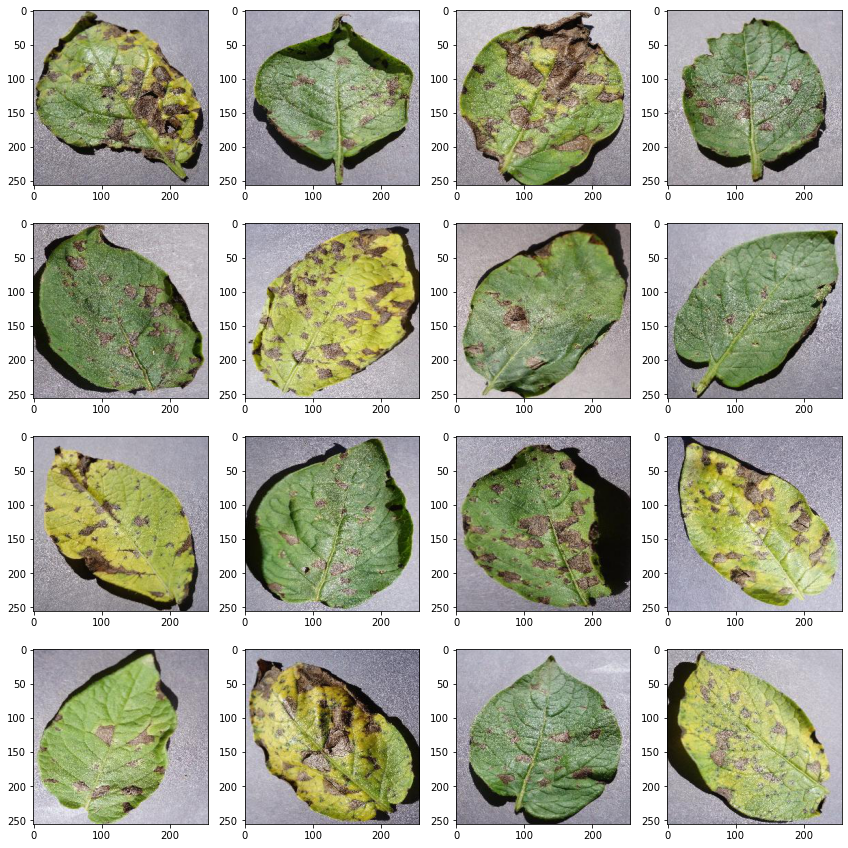

In [12]:
plt.figure(figsize=(12,12))
for i in range(1, 17):
    plt.subplot(4, 4, i)
    plt.tight_layout()
    rand_img = imread(potato+'/'+random.choice(sorted(os.listdir(potato))))
    plt.imshow(rand_img)
    

In [65]:
# from keras.preprocessing import LabelBinarizer
import keras
from keras.utils import img_to_array, array_to_img, to_categorical
# dir(keras.preprocessing.image)
# dir(keras.utils)

In [24]:
def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None:
            image = cv2.resize(image, (256, 256))
            return img_to_array(image)
        else:
            return np.array([])
    except Exception as e:
        print(f"Error: {e}")
        return None

In [53]:
plant_image = 'D:\\DataScience-60\\PlantDiseasePrediction\\Data\\Plant_images'
path_image = os.path.join(plant_image)
root_dir = os.listdir(path_image)
image_list, label_list = [], []
labels = root_dir
binary_label = [0, 1, 2]

In [54]:
temp = -1

for directory in root_dir:
    plant_image_list = os.listdir(f"{path_image}/{directory}")
    temp += 1
    for files in plant_image_list:
        image_path = f"{path_image}/{directory}/{files}"
        image_list.append(convert_image_to_array(image_path))
        label_list.append(binary_label[temp])
                                  

In [37]:
# print(label_list)
len(image_list), len(label_list)

(901, 900)

In [55]:
label_count = pd.DataFrame(label_list).value_counts()
label_count

0    300
1    300
2    300
dtype: int64

In [42]:
image_list[0].shape

(256, 256, 3)

In [56]:
np.array(label_list).shape
label_list = np.array(label_list)

In [59]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(image_list, label_list, test_size=0.2, random_state=42)

In [60]:
X_train = np.array(X_train, dtype=np.float16) / 255.0
X_test = np.array(X_test, dtype=np.float16) / 255.0

In [61]:
X_train = X_train.reshape(-1, 256, 256, 3)
X_test = X_test.reshape(-1, 256, 256, 3)

In [66]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [74]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

In [76]:
len(X_train),len(X_test),len(X_val)

(576, 180, 144)

In [72]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.optimizers import Adam

In [70]:
model = tf.keras.Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=(256,256,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(16, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(8, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 85, 85, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 85, 85, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 42, 42, 16)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 28224)             0         
                                                                 
 dense (Dense)               (None, 8)                

In [73]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001),
             metrics = ['accuracy'])

In [77]:
epochs = 10
batch_size=32
history = model.fit(X_train,y_train,batch_size=batch_size,epochs=epochs,
                   validation_data=(X_val, y_val))

Epoch 1/10
18/18 [==============================] - 51s 2s/step - loss: 1.0591 - accuracy: 0.4844 - val_loss: 0.8812 - val_accuracy: 0.9306
Epoch 2/10
18/18 [==============================] - 33s 2s/step - loss: 0.7377 - accuracy: 0.8264 - val_loss: 0.5673 - val_accuracy: 0.9375
Epoch 3/10
18/18 [==============================] - 32s 2s/step - loss: 0.5509 - accuracy: 0.9340 - val_loss: 0.4663 - val_accuracy: 0.9792
Epoch 4/10
18/18 [==============================] - 32s 2s/step - loss: 0.4934 - accuracy: 0.9635 - val_loss: 0.4328 - val_accuracy: 0.9792
Epoch 5/10
18/18 [==============================] - 33s 2s/step - loss: 0.4177 - accuracy: 0.9688 - val_loss: 0.3944 - val_accuracy: 0.9792
Epoch 6/10
18/18 [==============================] - 37s 2s/step - loss: 0.3961 - accuracy: 0.9878 - val_loss: 0.3863 - val_accuracy: 0.9792
Epoch 7/10
18/18 [==============================] - 32s 2s/step - loss: 0.3649 - accuracy: 0.9861 - val_loss: 0.3690 - val_accuracy: 0.9653
Epoch 8/10
18/18 [==

In [78]:
model.save("D:\\DataScience-60\\PlantDiseasePrediction\\Data\\plant_disease.h5")

json_model = model.to_json()

with open('D:\\DataScience-60\\PlantDiseasePrediction\\Data\\plant_model.json', 'w') as json_file:
    json_file.write(json_model)
    
model.save_weights('D:\\DataScience-60\\PlantDiseasePrediction\\Data\\plant_model_weights.h5')

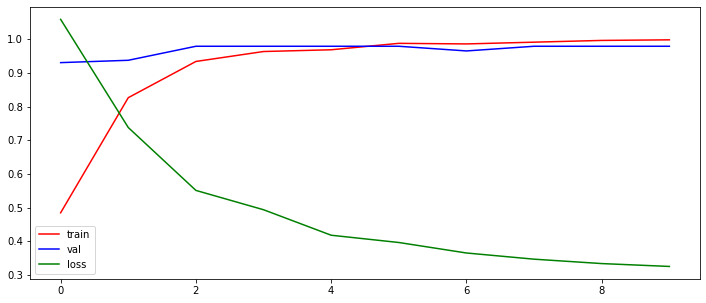

In [79]:
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], color='r')
plt.plot(history.history['val_accuracy'], color = 'b')
plt.plot(history.history['loss'], color='g')
plt.legend(['train','val','loss'])
plt.show()

In [80]:
scores = model.evaluate(X_test, y_test)
print(scores)

6/6 [==============================] - 3s 542ms/step - loss: 0.2955 - accuracy: 0.9778
[0.2954663038253784, 0.9777777791023254]


In [81]:
round(scores[1]*100, 2)

97.78

In [82]:
y_pred = model.predict(X_test)

6/6 [==============================] - 5s 574ms/step


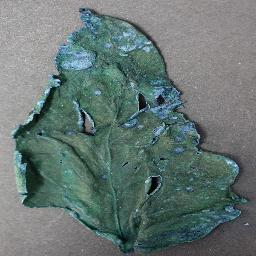

In [86]:
img = array_to_img(X_test[1])
img

In [94]:
print("Original: ", labels[np.argmax(y_test[10])])
print("Predict: ", labels[np.argmax(y_pred[10])])

Original:  Corn_(maize)___Common_rust_
Predict:  Corn_(maize)___Common_rust_
